In [45]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

### Question 1: 

___

Suppose the arousal of hot cats has a population that is normally distributed with a standard deviation of 6. Tomorrow you sample 49 hot cats from this population and obtain a mean arousal of 46.44 and a standard deviation of 5.6968.

Using an alpha value of α = 0.01, is this observed mean significantly less than an expected arousal of 47?

In [46]:
std = 6
n = 49
sample_mean = 46.44
sample_std = 5.6968
a = 0.01
mu = 47

H<sub>0 : mu = 47

H<sub>1 : mu < 47

In [47]:
sample_mean_std = std / np.sqrt(n)
z = (sample_mean - mu) / ( sample_mean_std )
p_value = norm.cdf(z)
print("p_value = ", p_value)

p_value =  0.2567707037112666


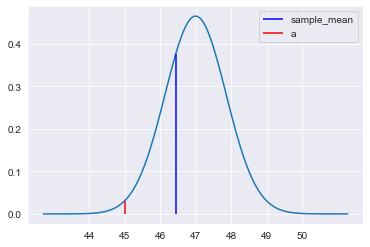

In [48]:
x_a = norm.ppf(a, loc=mu, scale=sample_mean_std)
x = np.linspace(mu - sample_mean_std * 5,
                mu + sample_mean_std * 5,
                num=100)
y = norm.pdf(x, loc=mu, scale=sample_mean_std)
ax = sns.lineplot(x=x, y=y)
plt.xticks([44, 45, 46, 47, 48, 49, 50])
plt.vlines(sample_mean, 0, norm.pdf(sample_mean, loc=mu, scale=sample_mean_std), 'b', label='sample_mean')
plt.vlines(x_a, 0, norm.pdf(x_a, loc=mu, scale=sample_mean_std), 'r', label='a')
plt.legend()

#### Ans:

Since p_value > α, we fail to reject H<sub>0. 

The arousal of hot cats is not significant less than 47. 